
### Modelo depredador-presa: León, ñu y cebra.




### Objetivos.

> #### 1. Objetivo general.
> - Simular un modelo de depredador-presa para leones, ñus y cebras mediante el uso de ecuaciones diferenciales.

> #### 2. Objetivos específicos
> -  Definir nuestras condiciones iniciales para los leones, ñus y cebras.
> -  Plantear y resolver las ecuaciones diferenciales que representan el modelo.
> -  Representar la solución de forma gráfica.





### 2.3 Modelo que representa el problema.
> - Se debe incluir las ecuaciones dinámicas que modelan el problema (conjunto de ecuaciones diferenciales).
> - Deducción del modelo. Explicación usando los fenómenos que involucre el problema (por ejemplo: leyes de Newton, conservación de energía y de materia, capitalización compuesta, etcétera).
> - ¿Qué situación representa el modelo? ¿Cuáles son las limitaciones fundamentales?
> - Significado y valor de los parámetros (constantes que aparezcan en el modelo).



## Enfoque Simplista con Mutualismo

Modelo que describe el comportamiento de las 3 especies (Búfalos, Leones y Zebras, respectivamente):

$$\frac{dx}{dt}=0.405x-0.81xy+0.015xz $$
$$\frac{dy}{dt}=-1.5y+0.125(0.81xy+0.75yz) $$ 
$$\frac{dz}{dt}= 0.34z-0.75yz+0.02xz$$

- En el Enfoque Simplista, los parametros de *0.81* y *0.75* son el ratio de muerte por interacción con Leones, los Leones comen más Ñus que Cebras (28% vs. 19%)
- Los terminos $xz$ se refieren al mutualismo entre Ñus y Cebras

## Enfoque Logístico

$$\frac{dx}{dt}=0.405x(1-\frac{x}{12})-0.81xy+0.015xz $$
$$\frac{dy}{dt}=-1.5y+0.125(xy+yz) $$ 
$$\frac{dz}{dt}= 0.34z(1-\frac{z}{12})-0.75yz+0.02xz$$

- Se introduce el crecimiento Logístico de las Cebras y los Ñus

## Enfoque Tipo II, combinación de Mutualismo y Logístico

$$\frac{dx}{dt}=0.405x-0.81xy+0.015xz $$
$$\frac{dy}{dt}=-1.5y+\frac{0.125(xy+yz)}{1+0.5y} $$ 
$$\frac{dz}{dt}= 0.34z-0.75yz+0.02xz$$

- Se incluye un factor limitante en la dínamica del León ya que se asume que este solo mate cuando tenga que alimentarse

### 2.4 Simulaciones.
> - Se debe simular para un conjunto representativo de condiciones iniciales (las condiciones iniciales deben tener sentido).


In [2]:
from scipy.integrate import solve_ivp, odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
tspan=[1,20]
cond_in=[10.6,.5,10.5]

### 2.5 Visualización de resultados de simulación.
> Se deben mostrar gráficas que ilustren de forma adecuada los resultados de simulación. No olviden etiquetar los ejes y si se tienen varias curvas en una sola gráfica también etiquetarlas (ojo: que las curvas se puedan diferenciar).

In [35]:
# Modelo Simplista con Mutualismo
def Modsim(t,X):
    x=X[0]
    y=X[1]
    z=X[2]
    return [0.405*x-(0.81*x*y)+(0.015*x*z), -1.5*y+(0.125*((0.81*x*y)+(0.75*y*z))), 0.35*z-(0.75*y*z)+(0.02*x*z)]

In [36]:
solsim=solve_ivp(Modsim, tspan, cond_in, max_step=0.1)

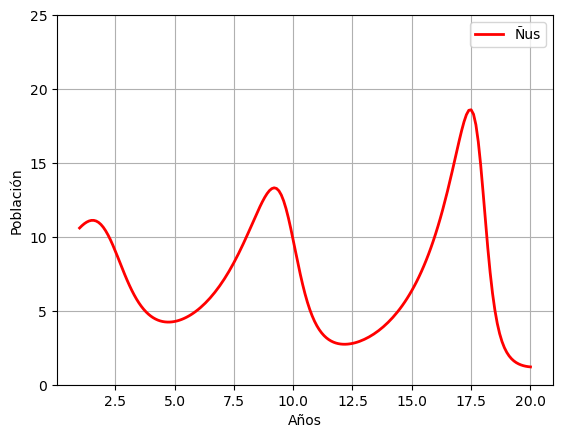

In [52]:
plt.figure()
plt.plot(solsim.t,solsim.y[0], color="r", lw=2, label="Ñus")
plt.ylim(0,25)
plt.xlabel("Años")
plt.ylabel("Población")
plt.legend()
plt.grid()

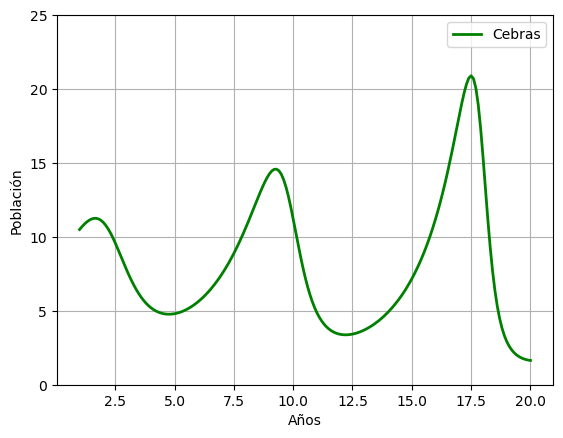

In [53]:
plt.figure()
plt.plot(solsim.t,solsim.y[2], color="g", lw=2, label="Cebras")
plt.ylim(0,25)
plt.xlabel("Años")
plt.ylabel("Población")
plt.legend()
plt.grid()

Text(0, 0.5, 'Población')

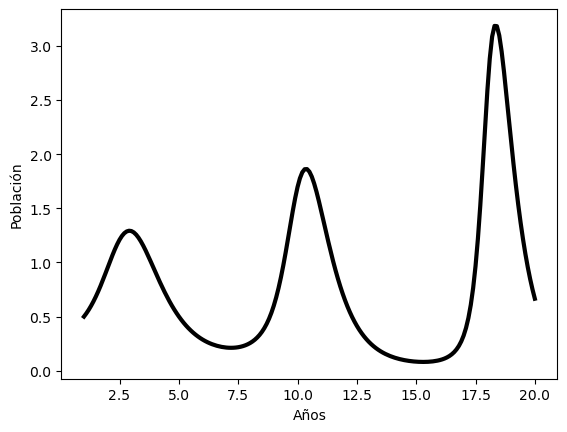

In [54]:
plt.figure()
plt.plot(solsim.t,solsim.y[1], color="k", lw=3, label="Leones")
plt.xlabel("Años")
plt.ylabel("Población")

In [40]:
#Modelo Logístico
def Modlog(t,X):
    x=X[0]
    y=X[1]
    z=X[2]
    return [0.405*x*(1-(x/12))-0.81*x*y+0.015*x*z, 
            -1.5*y+0.125*(x*y+y*z),
            0.34*z*(1-(z/12))-0.75*y*z+0.02*x*z]

In [41]:
sollog=solve_ivp(Modlog, tspan, cond_in, max_step=0.1)

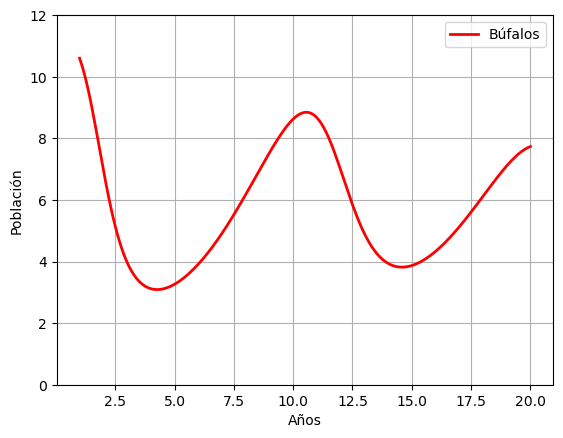

In [55]:
plt.figure()
plt.plot(sollog.t,sollog.y[0], color="r", lw=2, label="Búfalos")
plt.xlabel("Años")
plt.ylabel("Población")
plt.legend()
plt.ylim(0,12)
plt.grid()

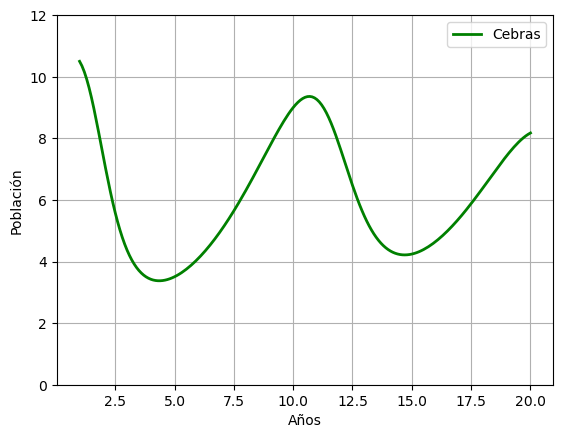

In [56]:
plt.figure()
plt.plot(sollog.t,sollog.y[2], color="g", lw=2, label="Cebras")
plt.xlabel("Años")
plt.ylabel("Población")
plt.legend()
plt.ylim(0,12)
plt.grid()

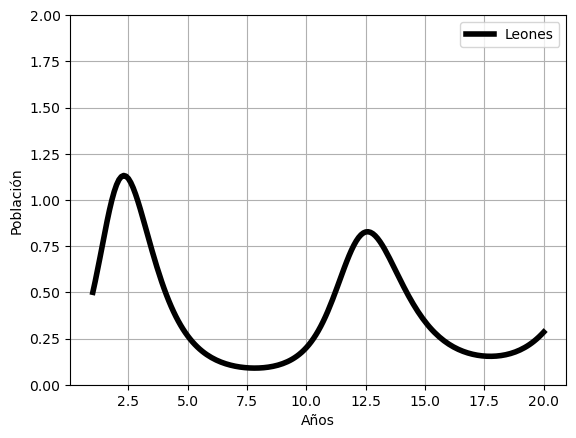

In [57]:
plt.figure()
plt.plot(sollog.t,sollog.y[1], color="k", lw=4, label="Leones")
plt.xlabel("Años")
plt.ylabel("Población")
plt.legend()
plt.ylim(0,2)
plt.grid()

In [61]:
ñus = np.array(sollog.y[0])
leones = np.array(sollog.y[1])
zebras = np.array(sollog.y[2])

C:\Users\Maru\AppData\Local\Temp\ipykernel_9400\1725747974.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


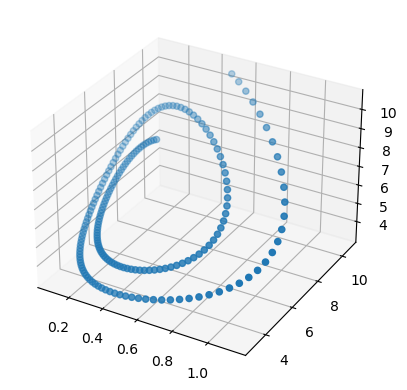

In [63]:
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(leones,ñus,zebras)

In [46]:
#Tipo II
def Modcom(t,X):
    x=X[0]
    y=X[1]
    z=X[2]
    return [0.405*x-0.81*x*y+0.015*x*z, 
            (-1.5*y+(0.125*x*y+0.125*y*z))/(1+0.5*y),
            0.34*z-0.75*y*z+0.02*x*z]

In [47]:
solcom=solve_ivp(Modcom, tspan, cond_in, max_step=0.1)

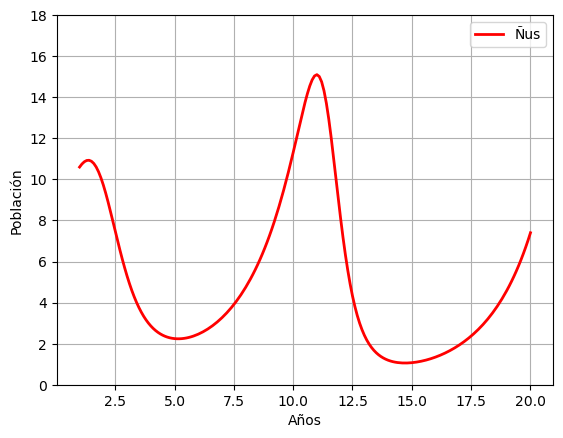

In [58]:
plt.figure()
plt.plot(solcom.t,solcom.y[0], color="r", lw=2, label="Ñus")
plt.ylim(0,18)
plt.xlabel("Años")
plt.ylabel("Población")
plt.legend()
plt.grid()

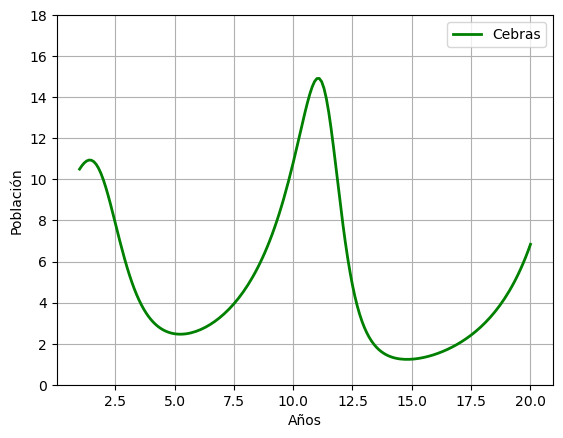

In [59]:
plt.figure()
plt.plot(solcom.t,solcom.y[2], color="g", lw=2, label="Cebras")
plt.ylim(0,18)
plt.xlabel("Años")
plt.ylabel("Población")
plt.legend()
plt.grid()

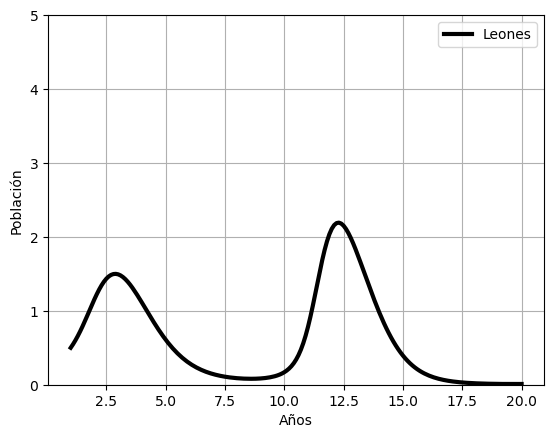

In [60]:
plt.figure()
plt.plot(solcom.t,solcom.y[1], color="k", lw=3, label="Leones")
plt.ylim(0,5)
plt.xlabel("Años")
plt.ylabel("Población")
plt.legend()
plt.grid()


### 2.6 Conclusiones. (RIOLO)
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.


Las simulaciones pueden ayudar a describir las interacciones, pero son muy sensibles a factores externos que normalmente presentan un grado de impredisibilidad como las sequias, plagas, intervención humana, etc. Debido a esto los modelos de hacen con supuestos que ignoran o mantienen constantes muchos de estos factores para que su simulación sea posible. Podría interpretarse como una tendencia que como un dato confiable, ya que no se aproximan lo suficiente a los censos vistos


### 2.7 Referencias.
> Jørgensen, S. E., & Bendoricchio, G. (2001). Fundamentals of Ecological Modelling (Vol. 482). Elsevier.